In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

In [3]:
f=xr.open_dataset('/data/sallen/results/MEOPAR/Karyn/01jan19_W08/SalishSea_1m_201901_201901_carp_T.nc')

## SST

In [4]:
## Data for original cold and warm years

monthly_array_temp_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 original temp      
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


### 2019 original               
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [5]:
monthly_array_temp_slice[monthly_array_temp_slice == 0 ] = np.nan
monthly_array_temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_slicemean))

(14, 12)


/tmp/ipykernel_414407/391916811.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_slice, axis = 2),axis = 2)


In [6]:
## Data for Experiments 1 and 2


monthly_array_temp_exp_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

          
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)

                
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)

                

###             
## Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)


for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)



In [7]:
monthly_array_temp_exp_slice[monthly_array_temp_exp_slice == 0 ] = np.nan
monthly_array_temp_exp_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_exp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_exp_slicemean))

(14, 12)


/tmp/ipykernel_414407/2338418733.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_exp_slice, axis = 2),axis = 2)


Text(0, 0.5, 'Degrees C')

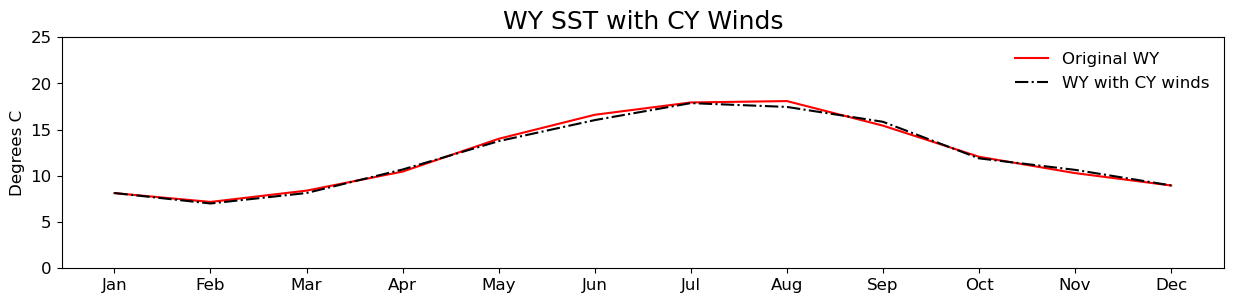

In [8]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_temp_slicemean[12,:],color='r',linestyle='-',label='Original WY')
ax.plot(xticks, monthly_array_temp_exp_slicemean[12,:],color='k',linestyle='-.',label='WY with CY winds')


ax.set_title('WY SST with CY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,25)
ax.set_ylabel('Degrees C')

In [9]:
monthly_array_temp_exp_slicemean[12,:]

array([ 8.14645587,  7.01214624,  8.14660785, 10.68830803, 13.75997804,
       16.03529369, 17.87510014, 17.46142722, 15.85366087, 11.8960487 ,
       10.65059721,  8.96727844])

Text(0, 0.5, 'Degrees C')

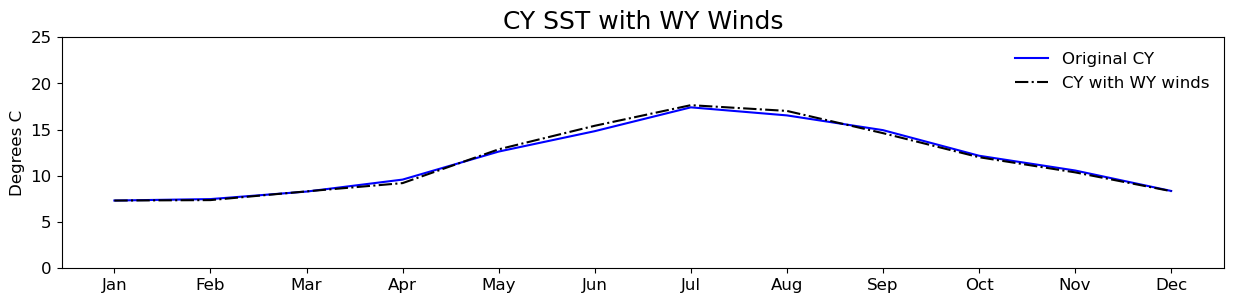

In [10]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_temp_slicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_temp_exp_slicemean[1,:],color='k',linestyle='-.',label='CY with WY winds')


ax.set_title('CY SST with WY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,25)
ax.set_ylabel('Degrees C')

In [11]:
monthly_array_temp_exp_slicemean[1,:]

array([ 7.32867713,  7.37786294,  8.3231585 ,  9.21771421, 12.87349833,
       15.42272486, 17.65206263, 17.02980416, 14.62421701, 12.02175631,
       10.38072145,  8.34520318])

## Salinity

In [12]:
## Data for original cold and warm years

monthly_array_sal_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['vosaline']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 original temp      
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_sal_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


### 2019 original               
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_sal_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [13]:
monthly_array_sal_slice[monthly_array_sal_slice == 0 ] = np.nan
monthly_array_sal_slicemean = \
np.nanmean(np.nanmean(monthly_array_sal_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_sal_slicemean))

(14, 12)


/tmp/ipykernel_414407/1002028929.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_sal_slice, axis = 2),axis = 2)


In [14]:
## Data for Experiments 1 and 2


monthly_array_sal_exp_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['vosaline']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

          
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_sal_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=0, **slc).values)

                
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_sal_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=0, **slc).values)

                

###             
## Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_sal_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=0, **slc).values)


for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_sal_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=0, **slc).values)



In [15]:
monthly_array_sal_exp_slice[monthly_array_sal_exp_slice == 0 ] = np.nan
monthly_array_sal_exp_slicemean = \
np.nanmean(np.nanmean(monthly_array_sal_exp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_sal_exp_slicemean))

(14, 12)


/tmp/ipykernel_414407/373845788.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_sal_exp_slice, axis = 2),axis = 2)


Text(0, 0.5, '')

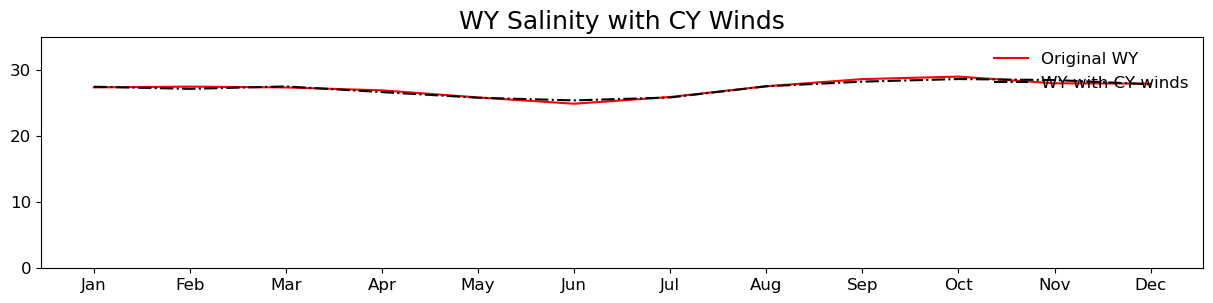

In [61]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_sal_slicemean[12,:],color='r',linestyle='-',label='Original WY')
ax.plot(xticks, monthly_array_sal_exp_slicemean[12,:],color='k',linestyle='-.',label='WY with CY winds')


ax.set_title('WY Salinity with CY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,35)
ax.set_ylabel('')

In [17]:
monthly_array_temp_exp_slicemean[12,:]

array([ 8.14645587,  7.01214624,  8.14660785, 10.68830803, 13.75997804,
       16.03529369, 17.87510014, 17.46142722, 15.85366087, 11.8960487 ,
       10.65059721,  8.96727844])

Text(0, 0.5, 'Degrees C')

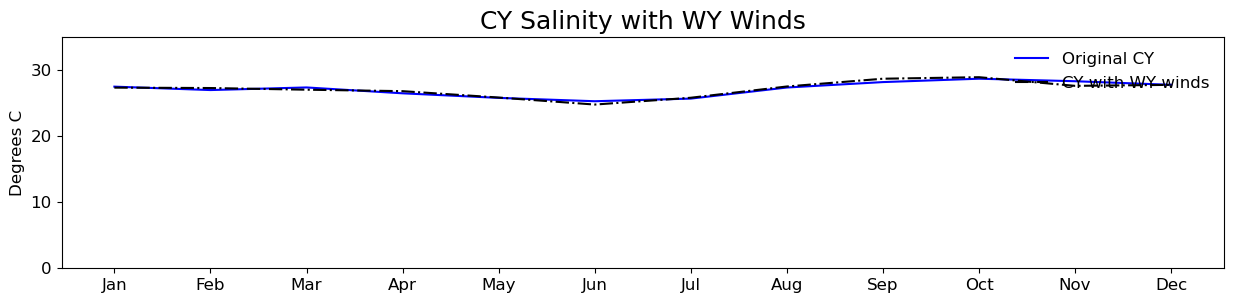

In [63]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_sal_slicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_sal_exp_slicemean[1,:],color='k',linestyle='-.',label='CY with WY winds')


ax.set_title('CY Salinity with WY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,35)
ax.set_ylabel('Degrees C')

In [19]:
monthly_array_temp_exp_slicemean[1,:]

array([ 7.32867713,  7.37786294,  8.3231585 ,  9.21771421, 12.87349833,
       15.42272486, 17.65206263, 17.02980416, 14.62421701, 12.02175631,
       10.38072145,  8.34520318])

## Surface PAR

In [20]:
## PAR data for original years

monthly_array_PAR_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PAR']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 original temp      

for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


### 2019 original               

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [21]:
monthly_array_PAR_slice[monthly_array_PAR_slice == 0 ] = np.nan
monthly_array_PAR_slicemean = \
np.nanmean(np.nanmean(monthly_array_PAR_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_PAR_slicemean))

(14, 12)


/tmp/ipykernel_414407/2771304440.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_PAR_slice, axis = 2),axis = 2)


In [22]:
# PAR data for experiments 1 and 2

monthly_array_PAR_exp_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PAR']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

            
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)

for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
                
###               
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)





In [23]:
monthly_array_PAR_exp_slice[monthly_array_PAR_exp_slice == 0 ] = np.nan
monthly_array_PAR_exp_slicemean = \
np.nanmean(np.nanmean(monthly_array_PAR_exp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_PAR_exp_slicemean))

(14, 12)


/tmp/ipykernel_414407/178454329.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_PAR_exp_slice, axis = 2),axis = 2)


Text(0, 0.5, 'm$^{-2}$')

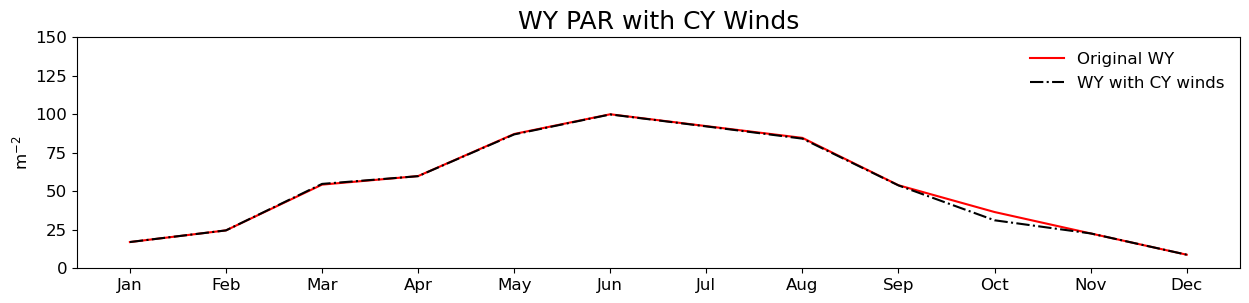

In [24]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_PAR_slicemean[12,:],color='r',linestyle='-',label='Original WY')
ax.plot(xticks, monthly_array_PAR_exp_slicemean[12,:],color='k',linestyle='-.',label='WY with CY winds')


ax.set_title('WY PAR with CY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,150)
ax.set_ylabel('m$^{-2}$')

In [25]:
monthly_array_PAR_exp_slicemean[12,:]

array([17.03780172, 24.60072459, 54.78386271, 59.81527983, 86.9326272 ,
       99.88901555, 92.12890537, 84.17495958, 53.80039932, 31.16474688,
       22.63734947,  8.80809555])

Text(0, 0.5, 'm$^{-2}$')

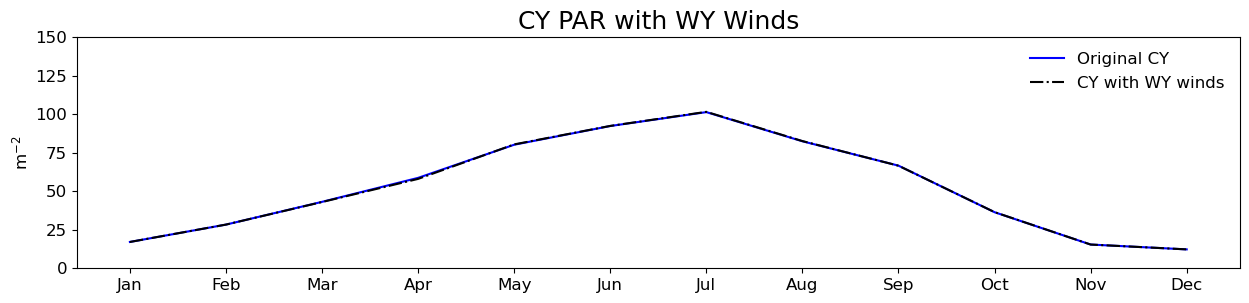

In [26]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_PAR_slicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_PAR_exp_slicemean[1,:],color='k',linestyle='-.',label='CY with WY winds')


ax.set_title('CY PAR with WY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,150)
ax.set_ylabel('m$^{-2}$')

In [27]:
monthly_array_PAR_exp_slicemean[1,:]

array([ 17.08353602,  28.37326272,  43.01647183,  58.04180417,
        80.44519267,  92.44319678, 101.58702584,  82.60674512,
        66.60162349,  36.45855418,  15.41110032,  12.26525511])

## Halocline Strength

In [28]:

# Halocline Strength data for original years


monthly_array_halocline_depth_orig_SSslice = np.zeros([14,12,50,55])
monthly_array_halocline_strength_orig_SSslice = np.zeros([14,12,50,55])

mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)}  
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2007, 2021), ['halocline','strength']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
         # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_orig_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

          

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
         # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_orig_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        


# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [29]:
monthly_array_halocline_strength_orig_SSslice[monthly_array_halocline_strength_orig_SSslice == 0 ] = np.nan
monthly_array_halocline_strength_orig_SSslicemean = \
np.nanmean(np.nanmean(monthly_array_halocline_strength_orig_SSslice, axis = 2),axis = 2)
print(np.shape(monthly_array_halocline_strength_orig_SSslicemean))

(14, 12)


/tmp/ipykernel_414407/1288103633.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_halocline_strength_orig_SSslice, axis = 2),axis = 2)


In [30]:
# Data for Experiments 1 and 2

monthly_array_halocline_depth_SSslice = np.zeros([14,12,50,55])
monthly_array_halocline_strength_SSslice = np.zeros([14,12,50,55])

mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)}  
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2007, 2021), ['halocline','strength']

# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_W19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
            
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_W19/SalishSea_1m_{datestr}_{datestr}'
        
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        
 
        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_W08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
            
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_W08/SalishSea_1m_{datestr}_{datestr}'
        
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [31]:
monthly_array_halocline_strength_SSslice[monthly_array_halocline_strength_SSslice == 0 ] = np.nan
monthly_array_halocline_strength_SSslicemean = \
np.nanmean(np.nanmean(monthly_array_halocline_strength_SSslice, axis = 2),axis = 2)
print(np.shape(monthly_array_halocline_strength_SSslicemean))

(14, 12)


/tmp/ipykernel_414407/3661973807.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_halocline_strength_SSslice, axis = 2),axis = 2)


Text(0, 0.5, 'g/kg m$^{-1}$')

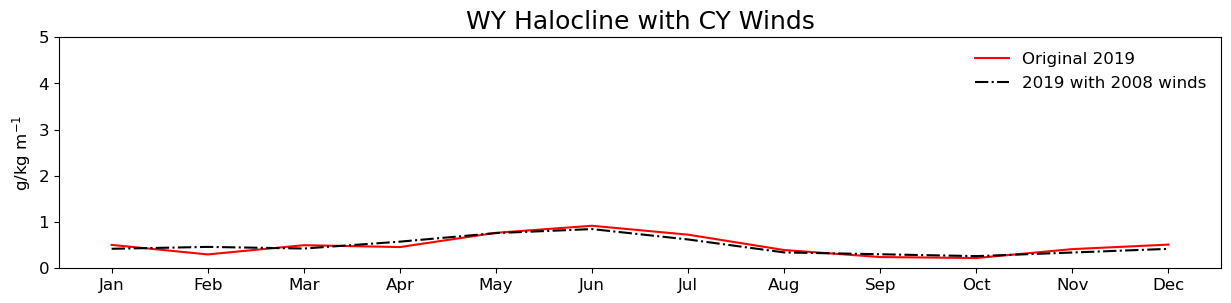

In [32]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_halocline_strength_orig_SSslicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_halocline_strength_SSslicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 winds')


ax.set_title('WY Halocline with CY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,5)
ax.set_ylabel('g/kg m$^{-1}$')

In [33]:
monthly_array_halocline_strength_SSslicemean[12,:]

array([0.42180693, 0.46271509, 0.42734386, 0.57608956, 0.76155694,
       0.84852958, 0.62366261, 0.34330928, 0.30336634, 0.26309921,
       0.34125838, 0.42042795])

Text(0, 0.5, 'g/kg m$^{-1}$')

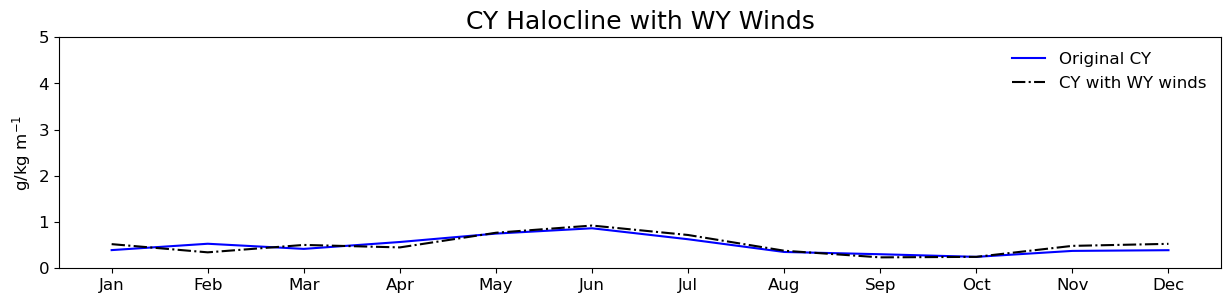

In [34]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_halocline_strength_orig_SSslicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_halocline_strength_SSslicemean[1,:],color='k',linestyle='-.',label='CY with WY winds')


ax.set_title('CY Halocline with WY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,5)
ax.set_ylabel('g/kg m$^{-1}$')

### Depth-averaged Nutrients (0-10m)

In [35]:

### Nitrate data for original cold and warm years


monthly_array_nitrate_orig_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['nitrate']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

          

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        


# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [36]:
monthly_array_nitrate_orig_slice[monthly_array_nitrate_orig_slice == 0 ] = np.nan
monthly_array_nitrate_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_nitrate_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_nitrate_orig_slicemean))

(14, 12)


/tmp/ipykernel_414407/3312634990.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_nitrate_orig_slice, axis = 2),axis = 2)


In [37]:

### Silicon data for original cold and warm years

monthly_array_silicon_orig_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)}  
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['silicon']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

   
 ### 
## Experimental Year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        


       



In [38]:
monthly_array_silicon_orig_slice[monthly_array_silicon_orig_slice == 0 ] = np.nan
monthly_array_silicon_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_silicon_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_silicon_orig_slicemean))

(14, 12)


/tmp/ipykernel_414407/241793216.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_silicon_orig_slice, axis = 2),axis = 2)


In [39]:

### Nitrate data for Experiments 1 and 2

monthly_array_nitrate_depthint_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)}  
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['nitrate']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_W19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_W19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)                


# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_W08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_W08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

     
        # # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [40]:
monthly_array_nitrate_depthint_slice[monthly_array_nitrate_depthint_slice == 0 ] = np.nan
monthly_array_nitrate_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_nitrate_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_nitrate_depthint_slicemean))

(14, 12)


/tmp/ipykernel_414407/231329215.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_nitrate_depthint_slice, axis = 2),axis = 2)


In [41]:

### Silicon data for Experiments 1 and 2


monthly_array_silicon_depthint_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['silicon']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_W19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

 # Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_W19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_W08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_W08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

         

# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]

In [42]:
monthly_array_silicon_depthint_slice[monthly_array_silicon_depthint_slice == 0 ] = np.nan
monthly_array_silicon_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_silicon_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_silicon_depthint_slicemean))

(14, 12)


/tmp/ipykernel_414407/3737416097.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_silicon_depthint_slice, axis = 2),axis = 2)


Text(0, 0.5, 'mmol N m$^{-2}$')

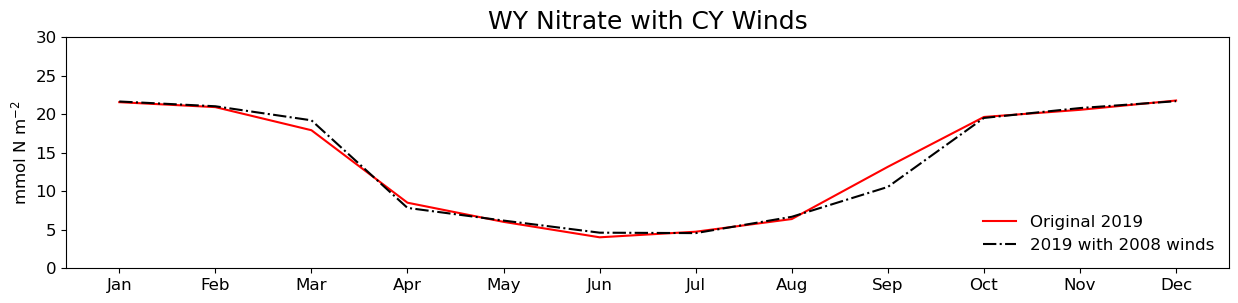

In [43]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_nitrate_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_nitrate_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 winds')


ax.set_title('WY Nitrate with CY Winds',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,30)
ax.set_ylabel('mmol N m$^{-2}$')

In [44]:
monthly_array_nitrate_orig_slicemean[12,:]

array([21.57243277, 20.92899135, 17.9291254 ,  8.51559135,  6.02777907,
        4.02324359,  4.74951853,  6.39493228, 13.17994572, 19.65073914,
       20.57838742, 21.78830309])

In [45]:
monthly_array_nitrate_depthint_slicemean[12,:]

array([21.66038559, 21.0403185 , 19.21647724,  7.84008496,  6.19449286,
        4.62365561,  4.56758753,  6.68605236, 10.56645226, 19.52426688,
       20.80733545, 21.70037408])

Text(0, 0.5, 'mmol N m$^{-2}$')

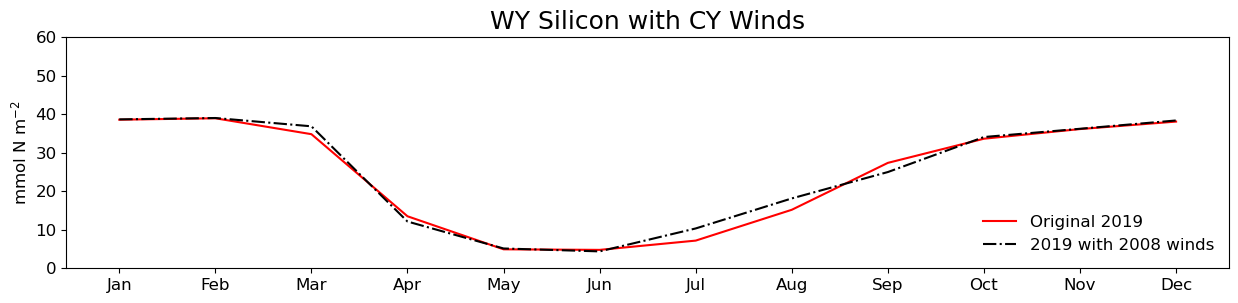

In [46]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_silicon_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_silicon_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 winds')


ax.set_title('WY Silicon with CY Winds',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,60)
ax.set_ylabel('mmol N m$^{-2}$')

In [47]:
monthly_array_silicon_orig_slicemean[12,:]

array([38.59489918, 38.9646331 , 34.83038859, 13.50759223,  4.92481292,
        4.78013531,  7.1877711 , 15.19434925, 27.37864199, 33.65281507,
       36.15829143, 38.10223153])

In [48]:
monthly_array_silicon_depthint_slicemean[12,:]

array([38.67510525, 39.03094112, 36.87522972, 12.14388828,  5.14287189,
        4.38668823, 10.34692467, 18.14587204, 24.99598325, 34.0888458 ,
       36.23634478, 38.39287235])

Text(0, 0.5, 'mmol N m$^{-2}$')

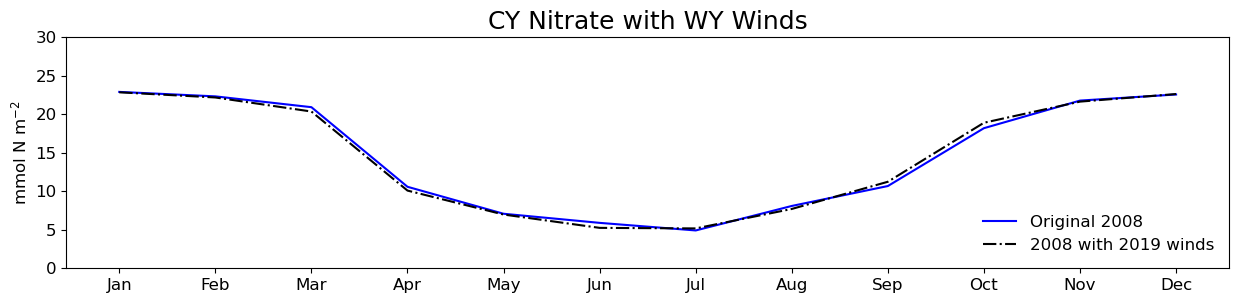

In [49]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_nitrate_orig_slicemean[1,:],color='b',linestyle='-',label='Original 2008')
ax.plot(xticks, monthly_array_nitrate_depthint_slicemean[1,:],color='k',linestyle='-.',label='2008 with 2019 winds')


ax.set_title('CY Nitrate with WY Winds',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,30)
ax.set_ylabel('mmol N m$^{-2}$')

In [50]:
monthly_array_nitrate_depthint_slicemean[1,:]

array([22.85211872, 22.18179099, 20.35672217, 10.09074041,  6.98042109,
        5.24828458,  5.17580267,  7.70375322, 11.23688619, 18.89975141,
       21.64378112, 22.63001116])

Text(0, 0.5, 'mmol N m$^{-2}$')

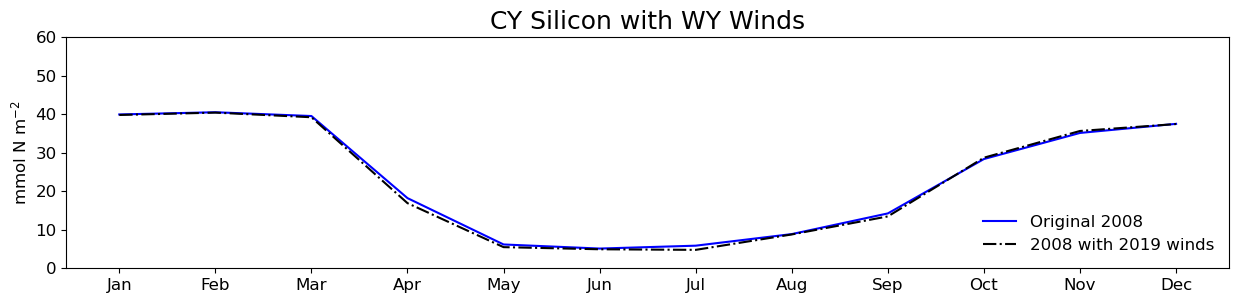

In [51]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_silicon_orig_slicemean[1,:],color='b',linestyle='-',label='Original 2008')
ax.plot(xticks, monthly_array_silicon_depthint_slicemean[1,:],color='k',linestyle='-.',label='2008 with 2019 winds')


ax.set_title('CY Silicon with WY Winds',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,60)
ax.set_ylabel('mmol N m$^{-2}$')

In [52]:
monthly_array_silicon_depthint_slicemean[1,:]

array([39.81782578, 40.43061962, 39.22806042, 16.91432895,  5.48931677,
        4.93604233,  4.78232392,  8.78881086, 13.47431659, 28.72550171,
       35.66415467, 37.46395395])

## Depth-integrated 0-100 m Diatoms

In [53]:

### Diatom data for original years

monthly_array_diatoms_orig_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 using higher temperature threshold       
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

                
### 2019 using higher temperature threshold                
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)




In [54]:
monthly_array_diatoms_orig_slice[monthly_array_diatoms_orig_slice == 0 ] = np.nan
monthly_array_diatoms_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_orig_slicemean))

(14, 12)


/tmp/ipykernel_414407/3403781678.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_diatoms_orig_slice, axis = 2),axis = 2)


In [55]:

#years, months, data
monthly_array_diatoms_depthint_slice = np.zeros([14,12,50,55])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(75,125), 'x': slice(225,280)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)


        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)


        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [56]:
monthly_array_diatoms_depthint_slice[monthly_array_diatoms_depthint_slice == 0 ] = np.nan
monthly_array_diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_depthint_slicemean))

(14, 12)


/tmp/ipykernel_414407/2320522072.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)


Text(0, 0.5, 'mmol N m$^{-2}$')

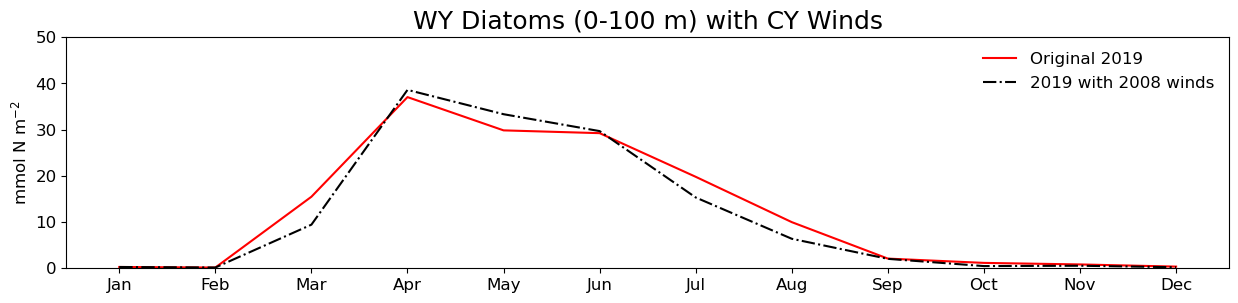

In [57]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_diatoms_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 winds')


ax.set_title('WY Diatoms (0-100 m) with CY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,50)
ax.set_ylabel('mmol N m$^{-2}$')

Text(0, 0.5, 'mmol N m$^{-2}$')

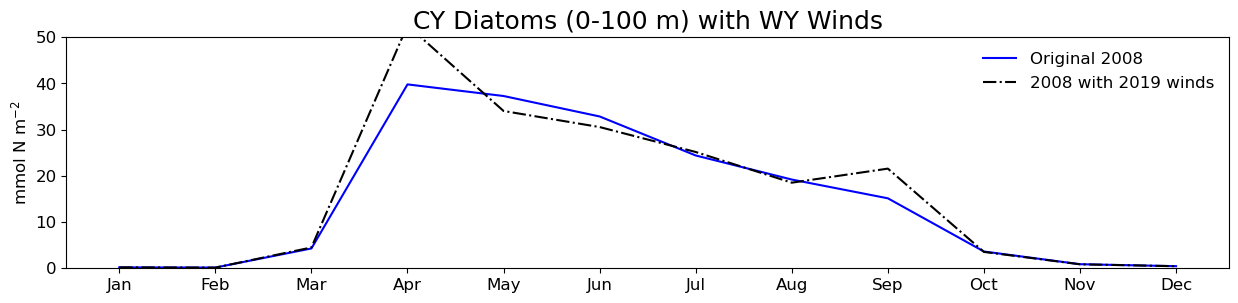

In [58]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_diatoms_orig_slicemean[1,:],color='b',linestyle='-',label='Original 2008')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[1,:],color='k',linestyle='-.',label='2008 with 2019 winds')


ax.set_title('CY Diatoms (0-100 m) with WY Winds',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,50)
ax.set_ylabel('mmol N m$^{-2}$')